# Chapter: Regression

* set of features  , 1 response variable to be predicted
* correlation betweeen features and  response variable


* Simple linear regression  ( 1 feature)

$$ \hat{Y} = \beta_0 + \beta_1 * X + \epsilon $$
$X$ predictor, $\hat{Y}$ estimated response, $\beta_0$ intercept , $\beta_1$ slope of $X$, $\epsilon$ statistical error

* Estimating coefficients  is done by minimizing the root mean sum of squares of the regressio
$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (Y_i-(\beta_0 + \beta_1*X_i))^2 }$$

* RMSE has unit and scale

### Accuracy: R-squared

$$SS_{res} = \sum_i (Y_i - \hat{Y}_i)^2$$      
$$SS_{tot} = \sum_i (Y_i - \bar{Y})^2$$
where $\bar{Y}$ is a sample mean response
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

$R^2$ fixes the problem of unit and sacle

$R^2$ close to 1  points to a very good linear fit

#### R commands
R> my_lm  <-lm(sales ~ ads, ata= shop_data)

R> summary(my_lm)

R> my_lm$coefficients

(Intercept)  nose_width 
  27.893058    2.701175 
[1] "predicted nose length: 703.186868647778,757.210373526108"


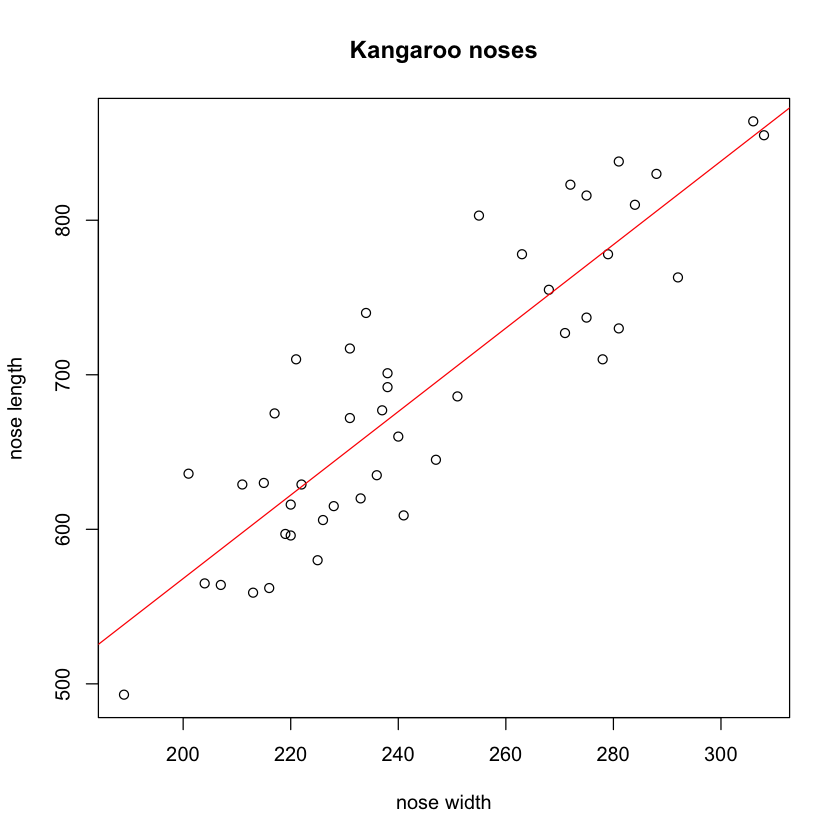

In [4]:
## example with a simple linear regression
# dataset of kangaroo measures of greay kangaroos nose width and length
kang_nose <-read.csv(file="kang_nose.csv", row.names=1, header=T)
#plot the data first
plot(kang_nose, xlab="nose width", ylab="nose length", main="Kangaroo noses")
#make linear regression
lm_kang <- lm(nose_length ~ nose_width, data=kang_nose)
print(lm_kang$coefficients)
abline(lm_kang$coefficients, col="red")
# additional feature values for which we want to know the predictor (nose_lentth)
nose_width_value <- c(250, 270)
# get predicted values
predicted <- predict(lm_kang, data.frame(nose_width=nose_width_value))
print(paste( "predicted nose length:" , paste(predicted, collapse=","))) 



In [5]:
##compaute manually RMSE
nose_length_est <- predict(lm_kang, kang_nose) #predic all (\hat{y})
res <- kang_nose$nose_length - nose_length_est #a vector of residuals
rmse <- sqrt( 1 / nrow(kang_nose) * sum(res^2) )
print(paste("RMSE",rmse))

[1] "RMSE 43.2628802866788"


In [7]:
#compute manually R2
ss_res  <- sum(res^2) #sum of residuals
ss_tot <- sum((kang_nose$nose_length - mean(kang_nose$nose_length))^2) #total sum of squares
r_sq <- 1 - (ss_res)/ss_tot
print(paste("manually compuated R squared", r_sq))
print(summary(lm_kang)) # check with manually computed value

[1] "manually compuated R squared 0.776891408938077"

Call:
lm(formula = nose_length ~ nose_width, data = kang_nose)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.876 -32.912  -4.855  30.227  86.307 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.8931    54.2991   0.514     0.61    
nose_width    2.7012     0.2207  12.236 1.34e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.26 on 43 degrees of freedom
Multiple R-squared:  0.7769,	Adjusted R-squared:  0.7717 
F-statistic: 149.7 on 1 and 43 DF,  p-value: 1.342e-15



[1] "r squared 0.382206714891686"
[1] "afganistan urbanisation 45.0120387342558"


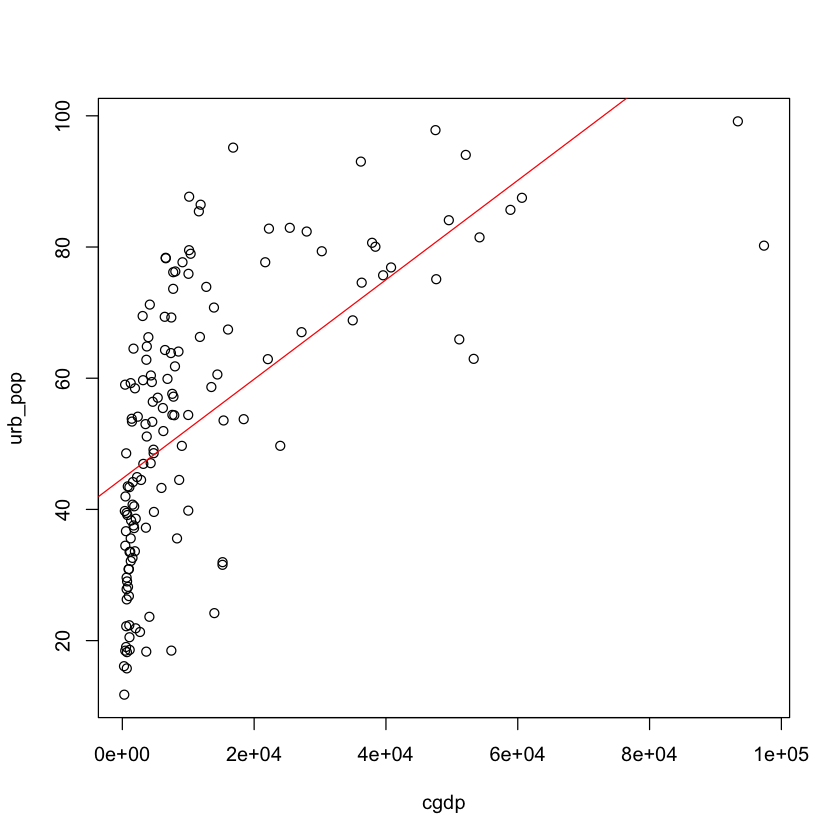

In [11]:
##example with less correlated data 
#rate of urban population vs country gdp
world_bank_train <-read.csv(file="worldbank_urb_gdp.csv", row.names=1, header=T)
plot(world_bank_train)
lm_wb <- lm(urb_pop ~ cgdp, data=world_bank_train)
abline(lm_wb$coefficients, col="red")
print(paste("r squared",summary(lm_wb)$r.squared)) #the r2
print(paste('afganistan urbanisation' , predict(lm_wb, data.frame(cgdp=413))))

[1] "r squared after log transform 0.578758792074867"
[1] "afganistan again 25.8675872630778"


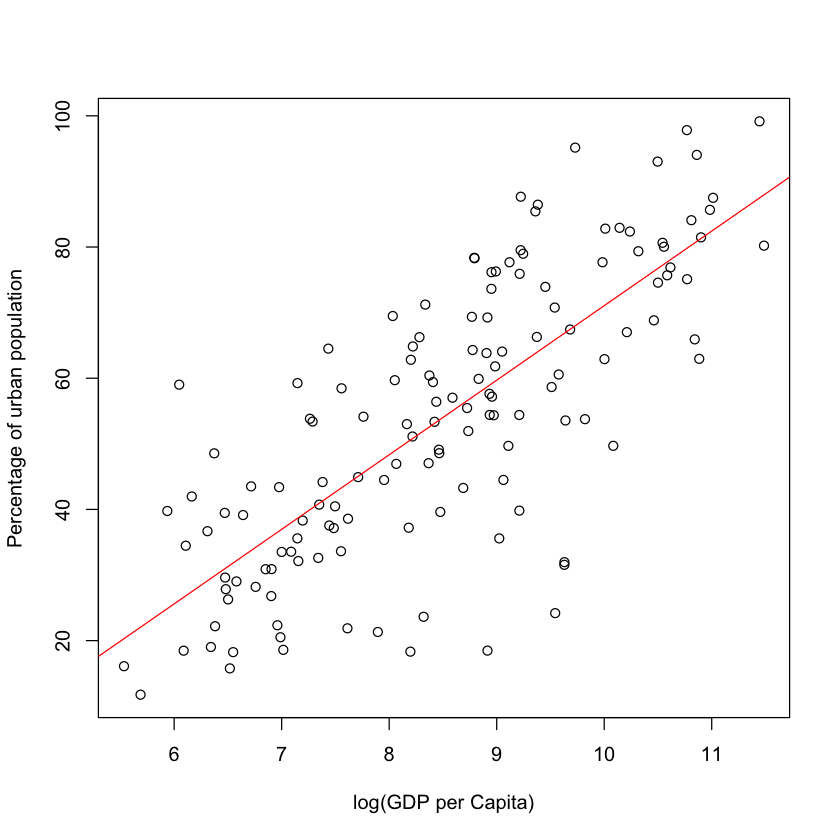

In [12]:
#study if  a log scaling can help
plot(urb_pop ~ log(cgdp), data = world_bank_train, 
     xlab = "log(GDP per Capita)", 
     ylab = "Percentage of urban population")

lm_wb <- lm(urb_pop ~ log(cgdp), data = world_bank_train)
abline(lm_wb$coefficients, col = "red")
print(paste('r squared after log transform',summary(lm_wb)$r.squared))

print(paste('afganistan again' , predict(lm_wb, data.frame(cgdp=413))))